In [1]:
import numpy as np 
import scipy
from scipy.integrate import quad 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def integrand_1(z,q_M):
    num = np.exp(-(z**2)/(2*(1-q_M)))
    den = np.sqrt(2*np.pi*(1-q_M))
    return num*1.0
def log_theta_prime(h,q_M):
    integration = quad(integrand_1, -np.inf, h, args=(q_M))
    return integrand_1(h,q_M)/integration[0]


In [3]:
def integrand_2(h,chi,q_M, sigma=0.0):
    num = np.exp(-(h+chi)**2/(2*(q_M+sigma)))
    den = np.sqrt(2*np.pi*(q_M+sigma))
    log_business = log_theta_prime(h,q_M)
    return (num/den)*(log_business**2)

In [4]:
chi = 0.0
q_M = 0.5
h_range = np.arange(0.1, 50, 0.1)
results = [scipy.integrate.quad(integrand_2, 0, h, args=(chi, q_M))[0] for h in h_range]
results = np.asarray(results)

# print scipy.integrate.quad(integrand_2, 0, 60, args=(chi, q_M))

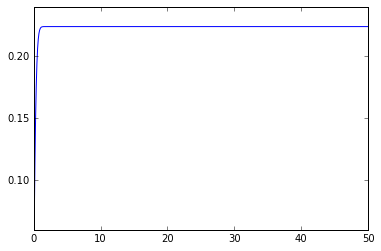

In [66]:
plt.plot(h_range, results)

# Solving for $q_M$ : Tests

In [73]:
# Params
m = 0.5
h = 50
alpha = 2.0
chi = 0.5
q = np.arange(0.01, 0.99, 0.01)
lhs = (q-m**2)/(1-q)**2

In [69]:
rhs = [alpha*quad(integrand_2,0,h, args=(chi,q_M), limit=100)[0] for q_M in q]

/home/dhruv/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars
/home/dhruv/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


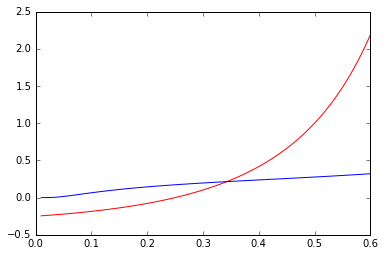

In [74]:
plt.plot(q[:60],lhs[:60], 'r', q[:60], np.asarray(rhs)[:60], 'b')

In [71]:
print len(q)

98


# Solving for $q_M$ : Newton-Raphson

In [83]:
def func_to_solve(q_M, m_0, chi, alpha, h=50.0, sigma = 0.0):
    return (q_M-m_0**2)/(1-q_M**2) - alpha*quad(integrand_2, 0,h, args=(chi,q_M), limit=100)[0]

In [89]:
print func_to_solve(0.69, m, chi, alpha)

0.467923556544


In [94]:
scipy.optimize.brentq(func_to_solve, 0.01, 0.5, args=(m,chi,alpha))

0.45517088234557623

In [91]:
from scipy.optimize import *

In [103]:
q_range = np.arange(0.01, 0.6, 0.01)
res = [func_to_solve(q,m,2.0,alpha) for q in q_range]

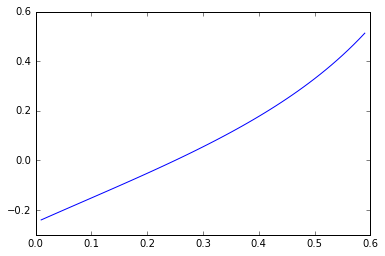

In [104]:
plt.plot(q_range, np.asarray(res))

In [105]:
sols = []
for chi in np.arange(-3.5, 2.0, 0.01):
    sols.append(scipy.optimize.brentq(func_to_solve, 0.01, 0.6, args=(m,chi,alpha)))

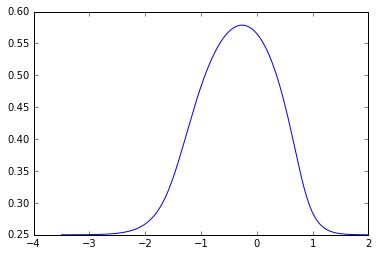

In [106]:
plt.plot(np.arange(-3.5, 2.0,0.01), np.asarray(sols))